In [47]:
import os
import keras
import tensorflow
import seaborn as sns
from keras.models import Sequential
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:


# Define the path to the uploaded zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/dataset/Dataset MeriSKILL.zip'

# Define the directory where you want to unzip the files
unzip_dir = '/content/drive/MyDrive/dataset'

# Create the target directory if it doesn't exist
os.makedirs(unzip_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

In [50]:
df=pd.read_csv('/content/drive/MyDrive/dataset/Sales Data.csv')
df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


**#Data Preprocessing**

In [51]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.dropna(inplace=True)

In [52]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df.shape

(185686, 10)

In [55]:
df.info

<bound method DataFrame.info of         Order ID                 Product  Quantity Ordered  Price Each  \
0         295665      Macbook Pro Laptop                 1     1700.00   
1         295666      LG Washing Machine                 1      600.00   
2         295667    USB-C Charging Cable                 1       11.95   
3         295668        27in FHD Monitor                 1      149.99   
4         295669    USB-C Charging Cable                 1       11.95   
...          ...                     ...               ...         ...   
185945    222905  AAA Batteries (4-pack)                 1        2.99   
185946    222906        27in FHD Monitor                 1      149.99   
185947    222907    USB-C Charging Cable                 1       11.95   
185948    222908    USB-C Charging Cable                 1       11.95   
185949    222909  AAA Batteries (4-pack)                 1        2.99   

                 Order Date                        Purchase Address  Month  \
0

In [56]:
#checking missing value using sum function
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

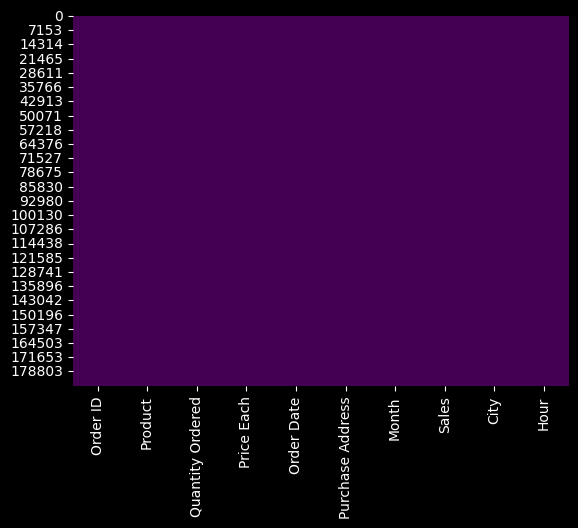

In [57]:
#checking missing valueusing heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


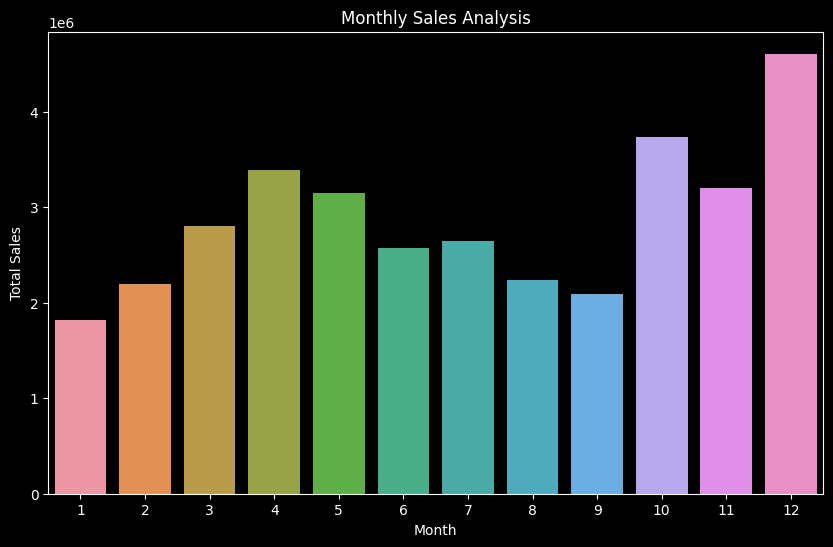

In [58]:
# Convert Order Date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract the month from the Order Date
df['Month'] = df['Order Date'].dt.month

# Calculate the total sales for each month
monthly_sales = df.groupby('Month')['Sales'].sum()

# Create a bar plot to visualize monthly sales
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Analysis')
plt.show()

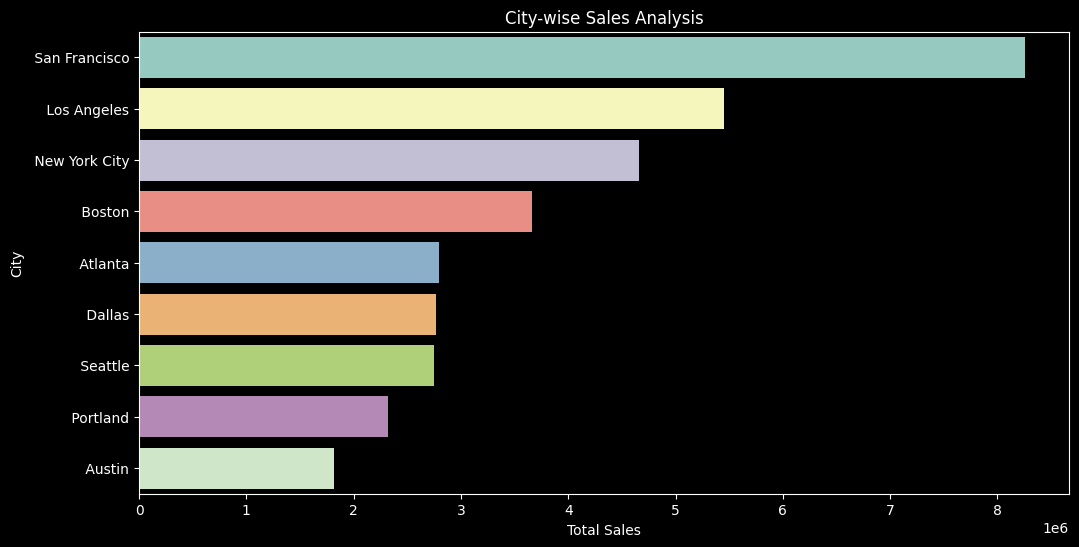

In [59]:
# Extract the city from the Purchase Address
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

# Calculate the total sales for each city
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Create a bar plot to visualize city-wise sales
plt.figure(figsize=(12, 6))
sns.barplot(x=city_sales.values, y=city_sales.index, orient='h')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.title('City-wise Sales Analysis')
plt.show()

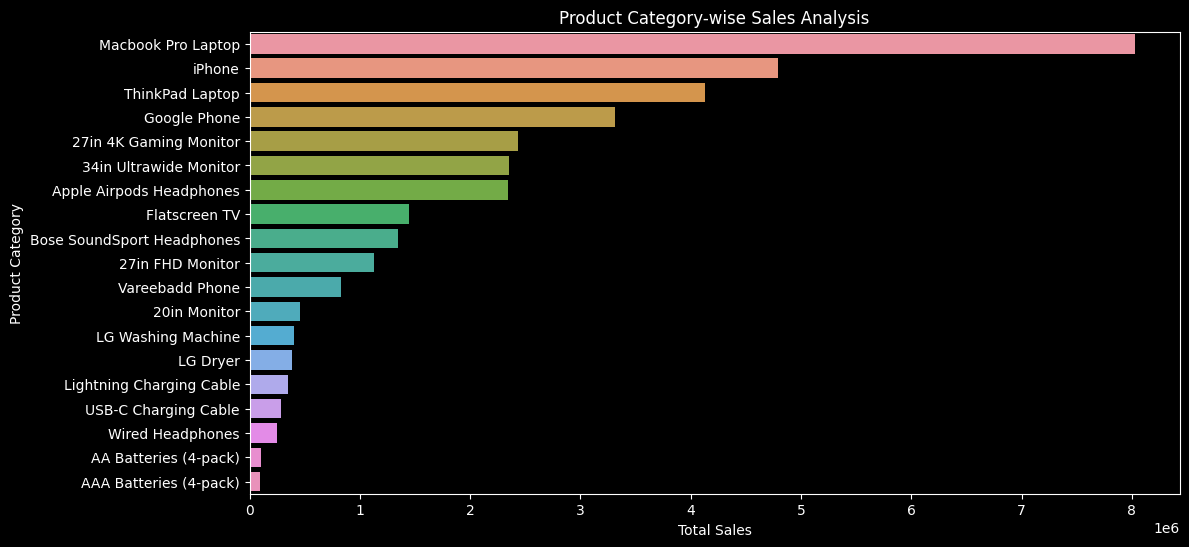

In [60]:
# Extract product category from the 'Product' column
df['Product Category'] = df['Product'].apply(lambda x: x.split(',')[0])

# Calculate total sales for each product category
category_sales = df.groupby('Product Category')['Sales'].sum().sort_values(ascending=False)

# Create a bar plot to visualize product category-wise sales
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, orient='h')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.title('Product Category-wise Sales Analysis')
plt.show()


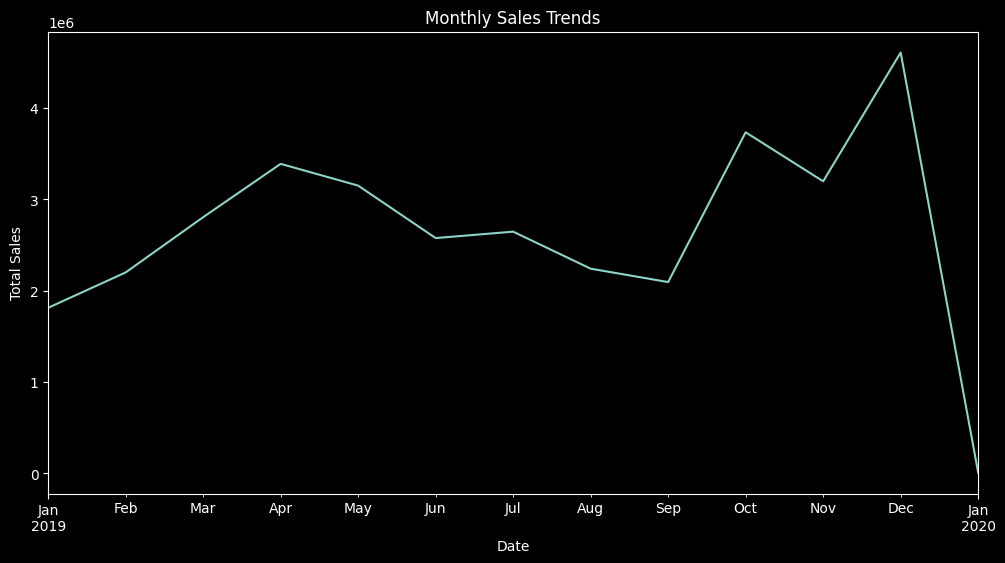

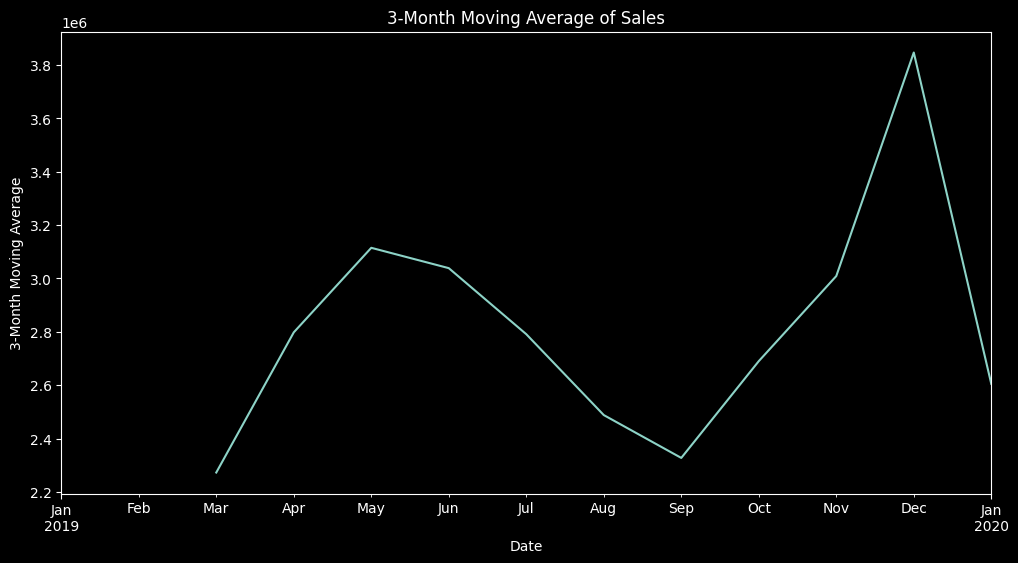

In [61]:
# Set 'Order Date' as the index for time series analysis
df.set_index('Order Date', inplace=True)

# Resample data by month and calculate total sales
monthly_sales = df['Sales'].resample('M').sum()

# Create a time series plot for monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.show()

# Calculate and visualize the 3-month moving average
rolling_avg = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(12, 6))
rolling_avg.plot()
plt.xlabel('Date')
plt.ylabel('3-Month Moving Average')
plt.title('3-Month Moving Average of Sales')
plt.show()
